In [2]:
#Notebook to use the Gill model to do some simulations for the TRACMIP continent response paper.
#Michela says the single Gaussian form of the model input is fine--just do a positive perturbation
#imitating the initial perturbation of the continent, and a negative perturbation associated with
#the rainfall response downwind, and plot the sum of these responses. Scale according to domain
#width (approximately)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import gill
from matplotlib.patches import Rectangle

In [4]:
import importlib
importlib.reload(gill)

<module 'gill' from '/home/russotto/projects/GillFromAdam/gill.py'>

In [5]:
### main_default testing--commented out ###

#For the positive one:
#About continent width--45 degrees out of 360 (1/8th) 
#so if lx is 20 have sx (mass source half-width) = 1.25
#Also continent length--between 30 N/S. 
#Domain goes up to 10 so make half-width 3 (based on 1 Rossby radius being
#about 10 degrees)
#(question about whether this is appropriate given value of beta?
# Maybe scale based on actual Coriolis parameter?
# beta = df/dy)
#(Also, what about the total magnitude of the mass source?
# Nothing was defined for this in original code, 
# need to add scaling factor. Maybe better than flip sign flag)
#gill.main_default(sx=1.25,sy=1.5, ymin=-7, ymax=7, D0=0.75)

In [6]:
#Negative one: 
#Precip. anomaly extends outward a little < 120 degrees, 1/3 of domain
#So make sx = 3, x0=-3
#About 10 degrees wide, sy=1, y0=0
#And negative.
#gill.main_default(sx=3,sy=0.5,x0=-3,ymin=-4,ymax=4, D0=-1)

In [7]:
#So, at least, strengthened trade winds not unreasonable. 
#How to superpose them? 
#Return variables to plot and add them up?

In [8]:
#Above is test plot stuff. 
#Now run individual functions and do more customized plots. 

In [9]:
#Run the setup M function for the continent perturbation
#setupDict1 = gill.setupGillM_Gaussian(sx=1.25,sy=3,D0=0.75)
setupDict1 = gill.setupGillM_Gaussian(sx=1.25,sy=1.5,D0=0.75)

#Same for downwind rainfall perturbation
setupDict2 = gill.setupGillM_Gaussian(sx=3,sy=0.5,x0=-3,D0=-1)

In [10]:
#Run the Gill Computations function for each of these
resultsDict1 = gill.GillComputations(setupDict1['M'], setupDict1['Mhat'], setupDict1['dMdyhat'])
resultsDict2 = gill.GillComputations(setupDict2['M'], setupDict2['Mhat'], setupDict2['dMdyhat'])



/home/russotto/miniconda3/envs/pangeo/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [11]:

#####   PLOTS   #####


In [12]:
#Define grid for plotting:
nx=128
ny=120
lx=20
ly=20

dx = lx/nx
x = -lx/2.+dx*np.arange(nx)
dy = ly/ny
y = -ly/2.+dy*np.arange(ny+1)

stride=4

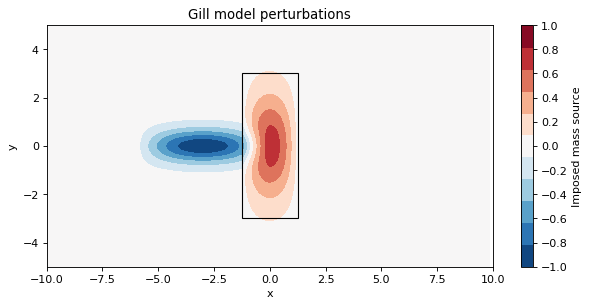

In [13]:
#Plot the two energy perturbations, superimposed
plt.figure(0, figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x,y,setupDict1['M']+setupDict2['M'],
           levels=np.linspace(-1,1,12), cmap=plt.cm.RdBu_r)
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Imposed mass source')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gill model perturbations')
plt.axis([-10, 10, -5, 5])

#Add continent indicator
plt.gca().add_patch(Rectangle((-1.25, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

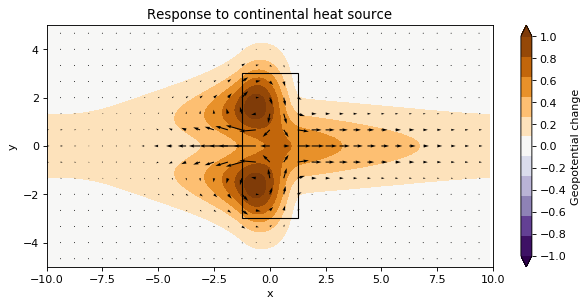

In [14]:
#Plot results from first perturbation--what, specifically?
#Geopotential and wind quiver responses, overlaid. 
#Geopotential as filled contour plot.
plt.figure(1, figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x, y, resultsDict1['phi'], levels=np.linspace(-1,1,12),
             cmap=plt.cm.PuOr_r, extend='both')
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Geopotential change')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Response to continental heat source')
plt.axis([-10, 10, -5, 5])

#Add quiver plot for winds
plt.quiver(x[0:nx:stride], y[0:ny:stride], 
           resultsDict1['u'][0:ny:stride,0:nx:stride], 
           resultsDict1['v'][0:ny:stride,0:nx:stride], 
           angles='xy', scale_units='xy', scale=1, color='k')

#Add continent indicator
plt.gca().add_patch(Rectangle((-1.25, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

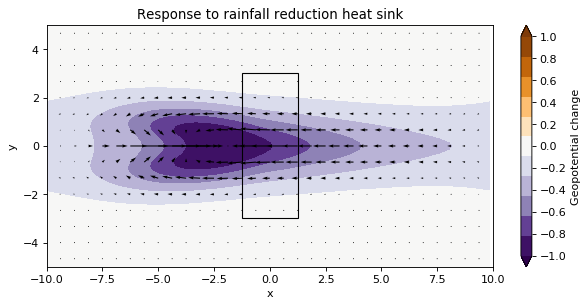

In [15]:
#Same thing for the negative perturbation associated with rainfall
plt.figure(2, figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x, y, resultsDict2['phi'], levels=np.linspace(-1,1,12),
             cmap=plt.cm.PuOr_r, extend='both')
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Geopotential change')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Response to rainfall reduction heat sink')
plt.axis([-10, 10, -5, 5])

#Add quiver plot for winds
plt.quiver(x[0:nx:stride], y[0:ny:stride], 
           resultsDict2['u'][0:ny:stride,0:nx:stride], 
           resultsDict2['v'][0:ny:stride,0:nx:stride], 
           angles='xy', scale_units='xy', scale=1, color='k')

#Add continent indicator
plt.gca().add_patch(Rectangle((-1.25, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

In [16]:
#Should I plot M itself? Or the sum of the two M?

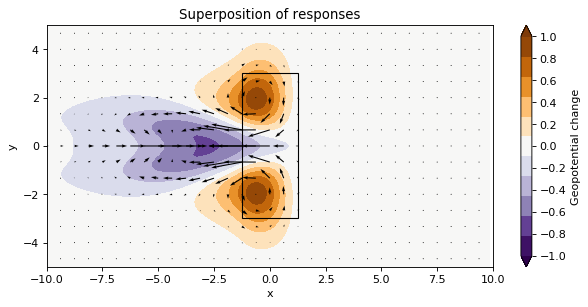

In [17]:
#Sum of the responses
plt.figure(3, figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x, y, resultsDict1['phi'] + resultsDict2['phi'], 
             levels=np.linspace(-1,1,12),
             cmap=plt.cm.PuOr_r, extend='both')
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Geopotential change')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Superposition of responses')
plt.axis([-10, 10, -5, 5])


#Add quiver plot for winds
plt.quiver(x[0:nx:stride], y[0:ny:stride], 
           resultsDict1['u'][0:ny:stride,0:nx:stride]
           + resultsDict2['u'][0:ny:stride,0:nx:stride], 
           resultsDict1['v'][0:ny:stride,0:nx:stride]
           + resultsDict2['v'][0:ny:stride,0:nx:stride], 
           angles='xy', scale_units='xy', scale=1, color='k')

#Add continent indicator
plt.gca().add_patch(Rectangle((-1.25, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

In [18]:
#Version with sharp boundary--set up and run
setupDict3 = gill.setupGillM_Gaussian_onlyY(sx=1.25,sy=1.5,D0=0.75)
resultsDict3 = gill.GillComputations(setupDict3['M'], setupDict3['Mhat'], setupDict3['dMdyhat'])

/home/russotto/miniconda3/envs/pangeo/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


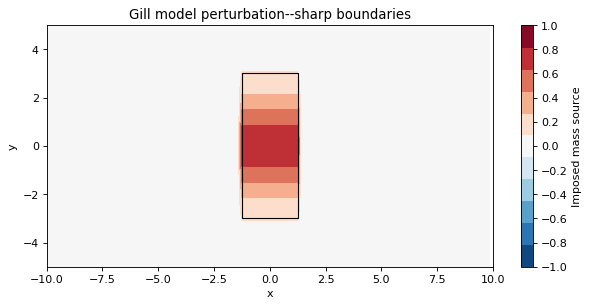

In [19]:
#Plot the energy perturbation
plt.figure(10, figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x,y,setupDict3['M'],
           levels=np.linspace(-1,1,12), cmap=plt.cm.RdBu_r)
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Imposed mass source')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gill model perturbation--sharp boundaries')
plt.axis([-10, 10, -5, 5])

#Add continent indicator
plt.gca().add_patch(Rectangle((-1.25, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

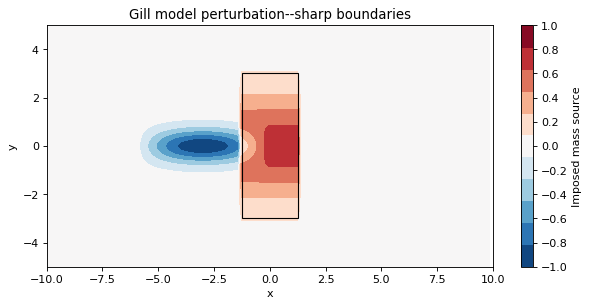

In [20]:
#Superimposed with the other one
plt.figure(11, figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x,y,setupDict3['M']+setupDict2['M'],
           levels=np.linspace(-1,1,12), cmap=plt.cm.RdBu_r)
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Imposed mass source')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gill model perturbation--sharp boundaries')
plt.axis([-10, 10, -5, 5])

#Add continent indicator
plt.gca().add_patch(Rectangle((-1.25, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

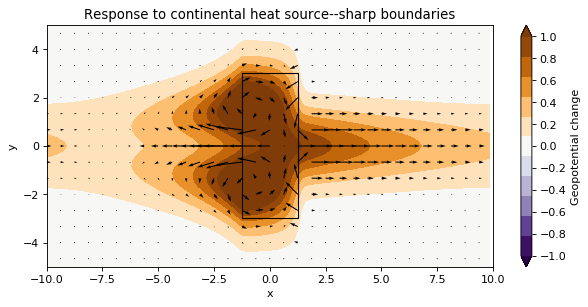

In [21]:
#Plot results from square continental heat source
plt.figure(12, figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x, y, resultsDict3['phi'], levels=np.linspace(-1,1,12),
             cmap=plt.cm.PuOr_r, extend='both')
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Geopotential change')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Response to continental heat source--sharp boundaries')
plt.axis([-10, 10, -5, 5])

#Add quiver plot for winds
plt.quiver(x[0:nx:stride], y[0:ny:stride], 
           resultsDict3['u'][0:ny:stride,0:nx:stride], 
           resultsDict3['v'][0:ny:stride,0:nx:stride], 
           angles='xy', scale_units='xy', scale=1, color='k')

#Add continent indicator
plt.gca().add_patch(Rectangle((-1.25, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

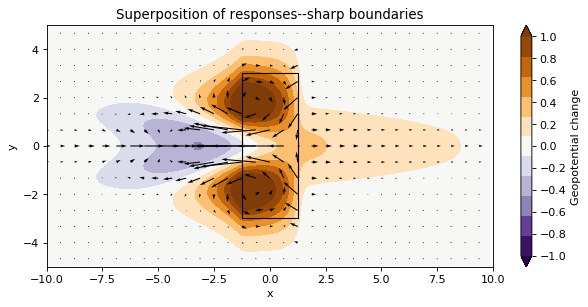

In [22]:
#Sum of the responses
plt.figure(13, figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x, y, resultsDict3['phi'] + resultsDict2['phi'], 
             levels=np.linspace(-1,1,12),
             cmap=plt.cm.PuOr_r, extend='both')
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Geopotential change')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Superposition of responses--sharp boundaries')
plt.axis([-10, 10, -5, 5])


#Add quiver plot for winds
plt.quiver(x[0:nx:stride], y[0:ny:stride], 
           resultsDict3['u'][0:ny:stride,0:nx:stride]
           + resultsDict2['u'][0:ny:stride,0:nx:stride], 
           resultsDict3['v'][0:ny:stride,0:nx:stride]
           + resultsDict2['v'][0:ny:stride,0:nx:stride], 
           angles='xy', scale_units='xy', scale=1, color='k')

#Add continent indicator
plt.gca().add_patch(Rectangle((-1.25, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

In [23]:
#1-11-19: Coming back to this after a hiatus...
#Need reverse of the "Continental Reduction Heat Source" and "Rainfall Reduction Heat Sink" plots. 
#Also: superpose the rainfall reduction one with a small positive perturbation for the rainfall increase?
setupDictOcean_lower = gill.setupGillM_Gaussian(sx=3,sy=0.5,x0=-3,D0=1)
setupDictContinentRainfall_upper = gill.setupGillM_Gaussian(sx=0.7,sy=0.4,x0=0,D0=0.6)
setupDictContinentRainfall_lower = gill.setupGillM_Gaussian(sx=0.7,sy=0.4,x0=0,D0=-0.6)

#Run the Gill Computations function for each of these
resultsDictOcean_lower = gill.GillComputations(setupDictOcean_lower['M'], setupDictOcean_lower['Mhat'], setupDictOcean_lower['dMdyhat'])
resultsDictContinentRainfall_upper = gill.GillComputations(setupDictContinentRainfall_upper['M'], 
                                                           setupDictContinentRainfall_upper['Mhat'], setupDictContinentRainfall_upper['dMdyhat'])
resultsDictContinentRainfall_lower = gill.GillComputations(setupDictContinentRainfall_lower['M'], 
                                                           setupDictContinentRainfall_lower['Mhat'], setupDictContinentRainfall_lower['dMdyhat'])

/home/russotto/miniconda3/envs/pangeo/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


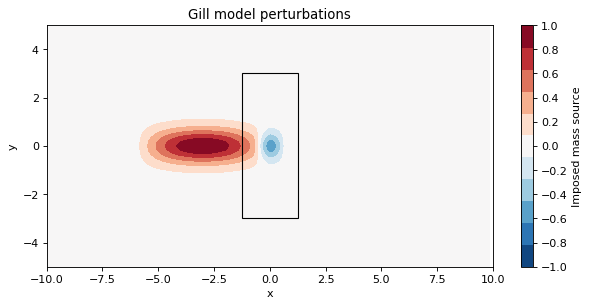

In [26]:
#Plot the two energy perturbations, superimposed (surface perspective)
plt.figure(20, figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x,y,setupDictOcean_lower['M']+setupDictContinentRainfall_lower['M'],
           levels=np.linspace(-1,1,12), cmap=plt.cm.RdBu_r)
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Imposed mass source')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gill model perturbations')
plt.axis([-10, 10, -5, 5])

#Add continent indicator
plt.gca().add_patch(Rectangle((-1.25, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

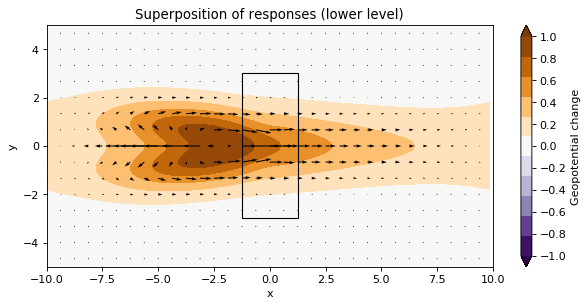

In [28]:
#Lower level wind response to both

#Sum of the responses
plt.figure(21, figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x, y, resultsDictOcean_lower['phi'] + resultsDictContinentRainfall_lower['phi'], 
             levels=np.linspace(-1,1,12),
             cmap=plt.cm.PuOr_r, extend='both')
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Geopotential change')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Superposition of responses (lower level)')
plt.axis([-10, 10, -5, 5])


#Add quiver plot for winds
plt.quiver(x[0:nx:stride], y[0:ny:stride], 
           resultsDictOcean_lower['u'][0:ny:stride,0:nx:stride]
           + resultsDictContinentRainfall_lower['u'][0:ny:stride,0:nx:stride], 
           resultsDictOcean_lower['v'][0:ny:stride,0:nx:stride]
           + resultsDictContinentRainfall_lower['v'][0:ny:stride,0:nx:stride], 
           angles='xy', scale_units='xy', scale=1, color='k')

#Add continent indicator
plt.gca().add_patch(Rectangle((-1.25, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

#This makes little difference... ocean perturbation overwhelms--much bigger area

In [32]:
#Upper level wind response to both
#Actually not necessary

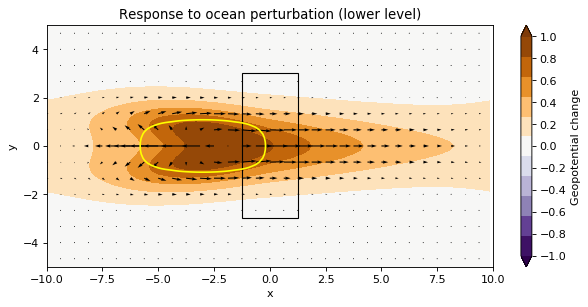

In [49]:
#Lower level wind response to ocean perturbation by itself
plt.figure(23, figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x, y, resultsDictOcean_lower['phi'], 
             levels=np.linspace(-1,1,12),
             cmap=plt.cm.PuOr_r, extend='both')
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Geopotential change')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Response to ocean perturbation (lower level)')
plt.axis([-10, 10, -5, 5])


#Add quiver plot for winds
plt.quiver(x[0:nx:stride], y[0:ny:stride], 
           resultsDictOcean_lower['u'][0:ny:stride,0:nx:stride], 
           resultsDictOcean_lower['v'][0:ny:stride,0:nx:stride], 
           angles='xy', scale_units='xy', scale=1, color='k')

#Add yellow contours for the source term 
plt.contour(x, y, setupDictOcean_lower['M'], colors='yellow', 
            #levels=[0.2, 0.4, 0.6, 0.8, 1])
            levels=[0.1])


#Add continent indicator
plt.gca().add_patch(Rectangle((-1.25, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

plt.savefig('figures/GillResponseOceanPerturbationLowerBranch.pdf')
plt.savefig('figures/GillResponseOceanPerturbationLowerBranch.png')

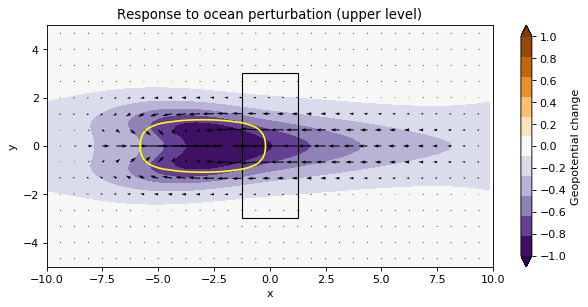

In [48]:
#Upper level wind response to ocean perturbation by itself
#(Include a contour of the source this time)
plt.figure(23, figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x, y, resultsDict2['phi'], 
             levels=np.linspace(-1,1,12),
             cmap=plt.cm.PuOr_r, extend='both')
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Geopotential change')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Response to ocean perturbation (upper level)')
plt.axis([-10, 10, -5, 5])


#Add quiver plot for winds
plt.quiver(x[0:nx:stride], y[0:ny:stride], 
           resultsDict2['u'][0:ny:stride,0:nx:stride], 
           resultsDict2['v'][0:ny:stride,0:nx:stride], 
           angles='xy', scale_units='xy', scale=1, color='k')

#Add yellow contours for the source term 
plt.contour(x, y, setupDictOcean_lower['M'], colors='yellow', 
            #levels=[0.2, 0.4, 0.6, 0.8, 1])
            levels=[0.1])


#Add continent indicator
plt.gca().add_patch(Rectangle((-1.25, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))


plt.savefig('figures/GillResponseOceanPerturbationUpperBranch.pdf')
plt.savefig('figures/GillResponseOceanPerturbationUpperBranch.png')

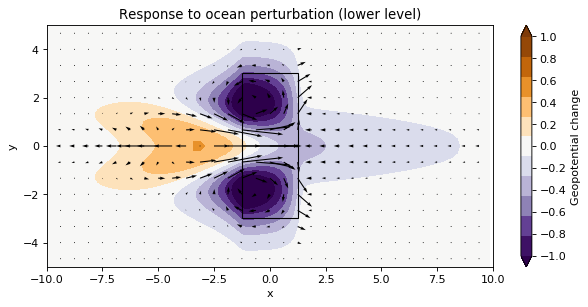

In [50]:
#Try one more combination: lower level response to ocean perturbation plus the negative of the land invariant-in-x "surface" perturbation

plt.figure(28, figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x, y, resultsDictOcean_lower['phi']-resultsDict3['phi'], 
             levels=np.linspace(-1,1,12),
             cmap=plt.cm.PuOr_r, extend='both')
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Geopotential change')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Response to ocean plus surface perturbation (lower level)')
plt.axis([-10, 10, -5, 5])


#Add quiver plot for winds
plt.quiver(x[0:nx:stride], y[0:ny:stride], 
           resultsDictOcean_lower['u'][0:ny:stride,0:nx:stride]-resultsDict3['u'][0:ny:stride,0:nx:stride], 
           resultsDictOcean_lower['v'][0:ny:stride,0:nx:stride]-resultsDict3['v'][0:ny:stride,0:nx:stride], 
           angles='xy', scale_units='xy', scale=1, color='k')

#Add continent indicator
plt.gca().add_patch(Rectangle((-1.25, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

plt.savefig('figures/GillResponseBothPerturbationsLowerBranch.pdf')
plt.savefig('figures/GillResponseBothPerturbationsLowerBranch.png')

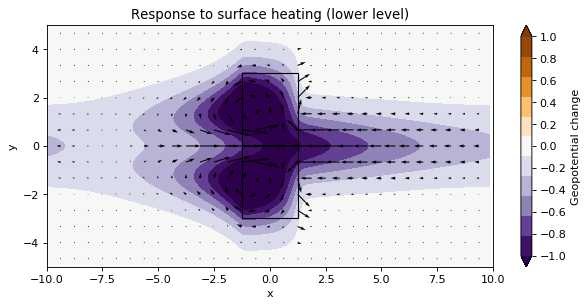

In [51]:
#And for good measure the land surface version by itself

plt.figure(29, figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x, y, -resultsDict3['phi'], 
             levels=np.linspace(-1,1,12),
             cmap=plt.cm.PuOr_r, extend='both')
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Geopotential change')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Response to surface heating (lower level)')
plt.axis([-10, 10, -5, 5])


#Add quiver plot for winds
plt.quiver(x[0:nx:stride], y[0:ny:stride], 
           -resultsDict3['u'][0:ny:stride,0:nx:stride], 
           -resultsDict3['v'][0:ny:stride,0:nx:stride], 
           angles='xy', scale_units='xy', scale=1, color='k')

#Add continent indicator
plt.gca().add_patch(Rectangle((-1.25, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

plt.savefig('figures/GillResponseSurfaceHeatingLowerBranch.pdf')
plt.savefig('figures/GillResponseSurfaceHeatingLowerBranch.png')

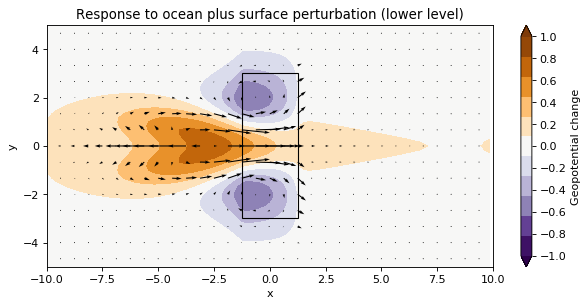

In [54]:
#What if I cut the surface heating term by a factor of 2, or 4?

plt.figure(28, figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x, y, resultsDictOcean_lower['phi']-.5*resultsDict3['phi'], 
             levels=np.linspace(-1,1,12),
             cmap=plt.cm.PuOr_r, extend='both')
cbar = plt.colorbar(ticks=np.linspace(-1,1,11))
cbar.set_label('Geopotential change')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Response to ocean plus surface perturbation (lower level)')
plt.axis([-10, 10, -5, 5])


#Add quiver plot for winds
plt.quiver(x[0:nx:stride], y[0:ny:stride], 
           resultsDictOcean_lower['u'][0:ny:stride,0:nx:stride]-.5*resultsDict3['u'][0:ny:stride,0:nx:stride], 
           resultsDictOcean_lower['v'][0:ny:stride,0:nx:stride]-.5*resultsDict3['v'][0:ny:stride,0:nx:stride], 
           angles='xy', scale_units='xy', scale=1, color='k')

#Add continent indicator
plt.gca().add_patch(Rectangle((-1.25, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

plt.savefig('figures/GillResponseOceanSmallSurfaceLowerBranch.pdf')
plt.savefig('figures/GillResponseOceanSmallSurfaceLowerBranch.png')

In [ ]:
#OK, new attempt: Gill model with tripole over the continent (based on precipitation changes) 
#and redoing values based on careful analysis of the precipitation change data.

